#1. Tensorflow & Keras



###1.1 Tensorflow

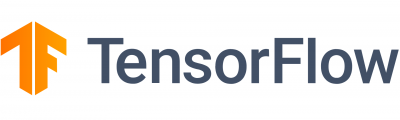

**Tensorflow**란 구글에서 개발한 수치 계산용 라이브러리이다.
- 핵심 구조는 **넘파이**와 매우 비슷하지만 **GPU/TPU**를 사용한 계산을 지원한다.
- 수치 연산에서 **Data Flow Graph**를 사용하여 연산한다.
- 저수준 텐서플로 연산은 C++ 코드로 구현되어 있으며, 연산은 커널(Kernel)이라는 여러 구현을 가진다.
- 커널은 CPU, GPU, TPU와 같은 특정 장치에 맞추어 만들어져 있으며, GPU/TPU의 경우 강력한 병렬 처리를 지원한다.

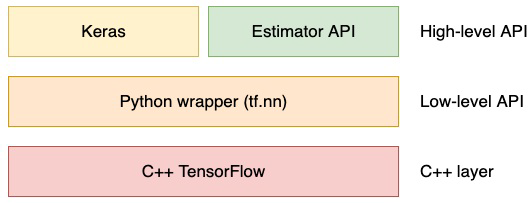

Tensorflow에서 Tensor라는 단어는 다차원 배열을 말한다.

Tensorflow란 텐서들의 흐름(Flow)을 뜻하며, 텐서들이 그래프의 엣지(edge)를 따라 흐르며 노드(node, vertex)에서 연산이 이루어진다.

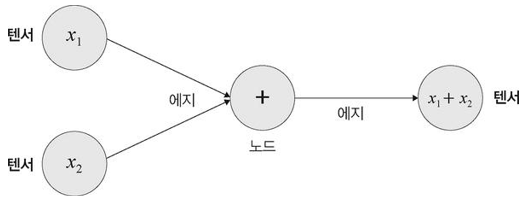

#### 1.1.1 넘파이처럼 텐서플로 사용하기



In [ ]:
import tensorflow as tf

In [ ]:
A = tf.constant([[1, 2, 3], [4, 5, 6]])
a  = tf.constant([2, 4, 5])

print("데이터 확인")
print(A)
print(a)

print("\n인덱스 참조")
print(A[:,1:])

print("\nShape & type")
print(A.shape)
print(A.dtype)

데이터 확인
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor([2 4 5], shape=(3,), dtype=int32)

인덱스 참조
tf.Tensor(
[[2 3]
 [5 6]], shape=(2, 2), dtype=int32)

Shape & type
(2, 3)
<dtype: 'int32'>


Tensorflow 또한 모든 종류의 텐서 연산이 가능하다.

In [ ]:
A + 10 # tf.add(A, 10)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [ ]:
tf.square(A)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

In [ ]:
A @ tf.transpose(A) # tf.matmul(A, tf.transpose(A))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]], dtype=int32)>

위에서 보여준 예시 외에도 mean(), sum(), max(), log() 등 numpy와 유사한 함수들이 모두 작동한다.

또한 numpy와 tensorflow 간에는 내장함수를 통해 타입 변환을 수행할 수 있다.

In [ ]:
A.numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [ ]:
import numpy as np
a = np.array([2, 4, 5])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 4, 5])>

#### 1.1.2 데이터 플로우 그래프 설계

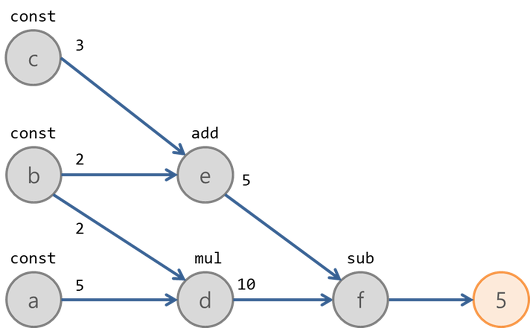

In [ ]:
################## Fill Your Code! ##################
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a, b)     # a * b
e = tf.add(c, b)          # c + b
f = tf.subtract(d, e)     # d - e
#####################################################
print(f)

tf.Tensor(5, shape=(), dtype=int32)


위에서는 add, multiply, subtract라는 간단한 예제로 구현 했지만,

이전 실습/과제에서 numpy를 통해 신경망을 만들었던 것을 생각하면,

**tensorflow를 통해서도 신경망을 구축**할 수 있다.

#### 1.1.3 텐서플로우 API

Tensorflow는 위에서 본 것 처럼, numpy와 같은 수학적 라이브러리 이지만, 단순한 수학적 API를 넘어 아래와 같은 다양한 API를 제공한다.

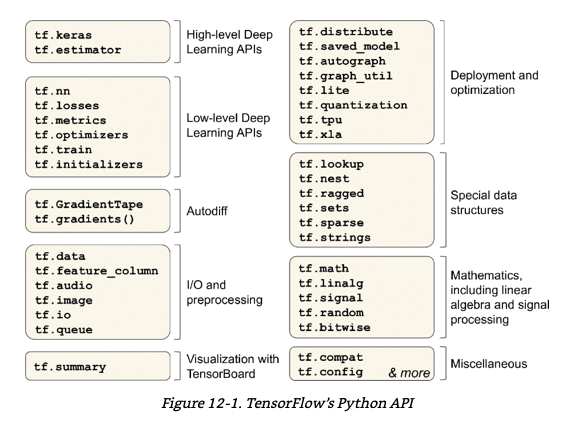

API 사용의 예로 tf.GradientTape을 사용해보자.

이 API는 자동으로 미분을 진행해주는 API이다.

In [ ]:
x = tf.constant(3.0)
y = tf.constant(2.0)

with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  g.watch(y)

  z0 = x ** 2
  z1 = y ** 3
  z2 = x ** 2 + 2*x*y + y**2

dz0_dx = g.gradient(z0, x)  # x^2의 미분값은 2*x
print(dz0_dx)

dz1_dy = g.gradient(z1, y)  # y^3의 미분값은 3*y^2
print(dz1_dy)

dz2_dx = g.gradient(z2, x)  # 편미분 : x^2 + 2xy + y^2 의 x에 대한 미분값은 2x+2y
print(dz2_dx)

dz2_dy = g.gradient(z2, y)  # 편미분 : x^2 + 2xy + y^2 의 y에 대한 미분값은 2x+2y
print(dz2_dy)

dz2 = g.gradient(z2, x, y)  # 전미분
print(dz2)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32)


이번에는 sigmoid에 대한 결과를 확인해보자.

In [ ]:
x = tf.constant(5.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  s = tf.sigmoid(x)

ds_dx = g.gradient(s, x)  # x^2의 미분값은 2*x
print(ds_dx)

tf.Tensor(0.006648033, shape=(), dtype=float32)


이번에는 실제 값과 비교해보자.

In [ ]:
import numpy as np
################## Fill Your Code! ##################
# sigmoid(5.0) 미분 값 구하기
ds = 1/(1+np.exp(-5.0))
sigmoid_prime = ds * (1 - ds)
#####################################################
print(sigmoid_prime)

0.006648056670790155


### 1.2 Keras

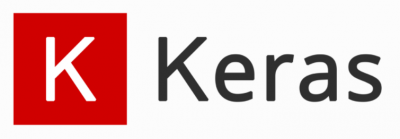

**Keras**란 Tensorflow를 기반으로 고수준 딥러닝 기능을 제공하는 API이다.

- 다양한 단일 신경망을 사용하여 사용자가 원하는 신경망을 쉽게 구현할 수 있다.
- 훈련, 평가, 실행에 대한 API를 제공한다.


예제를 통해 Keras API의 사용법을 살펴보자.

이전에 진행했던 MNIST 문제를 DNN으로 설계한다.

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000, )

(60000, 28, 28)
(60000,)


Y[0] :  5


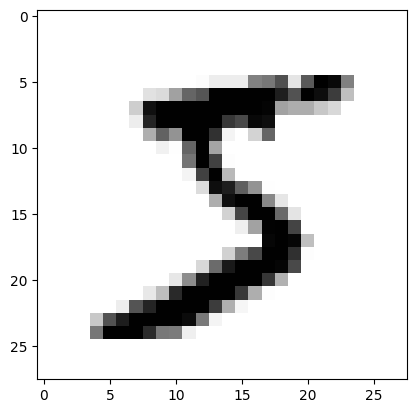

In [ ]:
import matplotlib.pyplot as plt

print("Y[0] : ",  y_train[0])
plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation = "nearest")

In [ ]:
# 데이터 전처리 전
print(x_train[0,15])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253
 150  27   0   0   0   0   0   0   0   0]


In [ ]:
# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train[0,15])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.17647059 0.72941176 0.99215686 0.99215686
 0.58823529 0.10588235 0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
# One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train[0].shape

(28, 28)

#### 1.2.1 Keras를 사용한 DNN

Keras에서는 Sequential이라는 Class를 사용하여 Layer를 관리한다.

Sequential Class에 있는 add() 함수를 사용하여 Leyer를 추가할 수 있다.

Layer들은 keras.layers API에 존재한다.[https://keras.io/api/layers/]

In [ ]:
################## Fill Your Code! ##################
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape))
model.add(tf.keras.layers.Dense(units=256, input_dim=784, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
#####################################################
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 24452

신경망 모델이 생성되었으면, 학습을 위한 세부 조정이 필요하다.

예를 들어 어떤 Loss function, Optimizer, Learning Rate 등이 있다.

위 설정들은 compile() 이라는 함수를 사용하여 설정한다.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
################## Fill Your Code! ##################
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))
#####################################################

Epoch 1/10
938/938 [==============================] - 18s 10ms/step - loss: 0.2464 - accuracy: 0.9266 - val_loss: 0.1151 - val_accuracy: 0.9655
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0958 - accuracy: 0.9701 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0914 - val_accuracy: 0.9732
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0896 - val_accuracy: 0.9735
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.0819 - val_accuracy: 0.9780
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0777 - val_accuracy: 0.9787
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0875 - val_accuracy: 0.9779

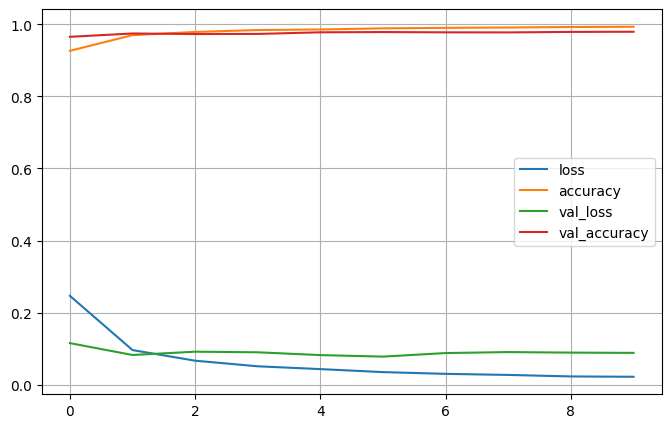

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.show()

# 2. DNN을 사용한 CIFAR10

### 2.1 CIFAR10 데이터셋

이번에는 데이터셋을 변경하여 학습을 진행하도록 한다.

In [ ]:
from tensorflow import keras

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images,test_images = train_images/255.0, test_images/255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_images.shape)
print(train_images.dtype)
print(test_images.shape)
print(test_images.dtype)

(50000, 32, 32, 3)
float64
(10000, 32, 32, 3)
float64


In [ ]:
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, stratify = train_labels, test_size = 0.1, random_state = 10)
print(train_images.shape, valid_images.shape)
print(np.unique(train_labels, return_counts = True))
print(np.unique(valid_labels, return_counts = True))
print(np.unique(test_labels, return_counts = True))

(45000, 32, 32, 3) (5000, 32, 32, 3)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


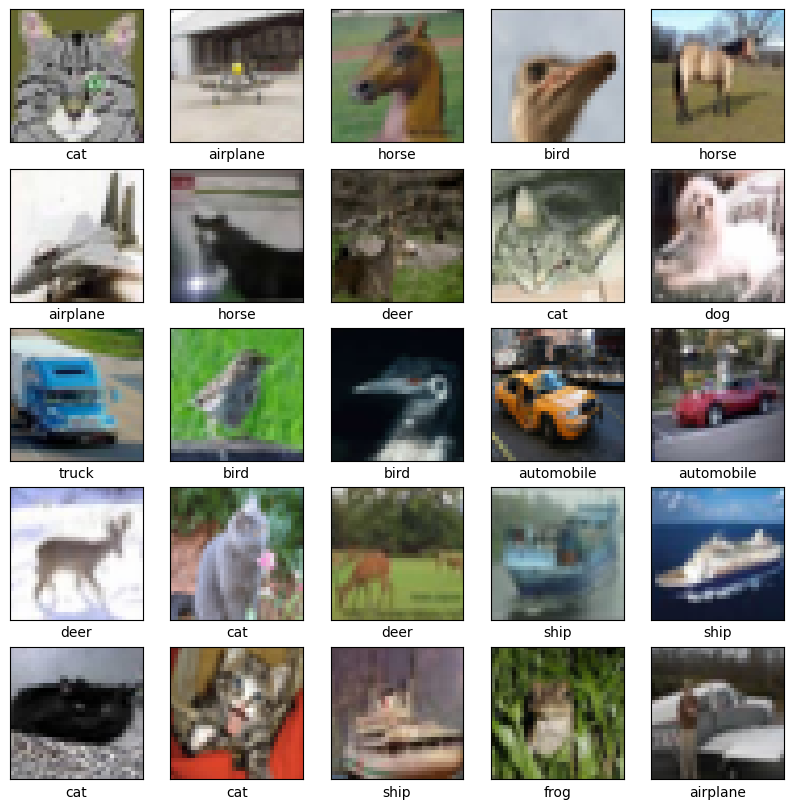

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
train_images[0].shape

(32, 32, 3)

### 2.2 DNN Model

In [ ]:
# Node의 개수가 1024 / 512 / 256 인 신경망을 작성하시오
# activation function : relu

################## Fill Your Code! ##################
dnn_model = keras.models.Sequential([ # List 이기 때문에 []로 받는다.
                                     keras.layers.Flatten(input_shape = train_images[0].shape),
                                     keras.layers.Dense(1024, activation = 'relu'),
                                     keras.layers.Dense(512, activation = 'relu'),
                                     keras.layers.Dense(256, activation = 'relu'),
                                     keras.layers.Dense(len(class_names), activation = 'softmax')
])
#####################################################
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 3805450 (14.52 MB)
Trainable params: 3805450 (14.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Model fit()
dnn_history = dnn_model.fit(train_images, train_labels, batch_size=64,epochs=20, validation_data = [valid_images, valid_labels])

Epoch 1/20
704/704 [==============================] - 5s 5ms/step - loss: 1.8843 - accuracy: 0.3167 - val_loss: 1.8453 - val_accuracy: 0.3276
Epoch 2/20
704/704 [==============================] - 3s 5ms/step - loss: 1.6910 - accuracy: 0.3929 - val_loss: 1.6777 - val_accuracy: 0.3952
Epoch 3/20
704/704 [==============================] - 5s 7ms/step - loss: 1.5934 - accuracy: 0.4301 - val_loss: 1.6024 - val_accuracy: 0.4216
Epoch 4/20
704/704 [==============================] - 5s 7ms/step - loss: 1.5446 - accuracy: 0.4468 - val_loss: 1.5614 - val_accuracy: 0.4406
Epoch 5/20
704/704 [==============================] - 5s 7ms/step - loss: 1.4938 - accuracy: 0.4652 - val_loss: 1.5608 - val_accuracy: 0.4428
Epoch 6/20
704/704 [==============================] - 5s 7ms/step - loss: 1.4559 - accuracy: 0.4765 - val_loss: 1.5191 - val_accuracy: 0.4474
Epoch 7/20
704/704 [==============================] - 3s 5ms/step - loss: 1.4213 - accuracy: 0.4897 - val_loss: 1.4692 - val_accuracy: 0.4742
Epoch 

Text(0.5, 1.0, 'Loss Curves')

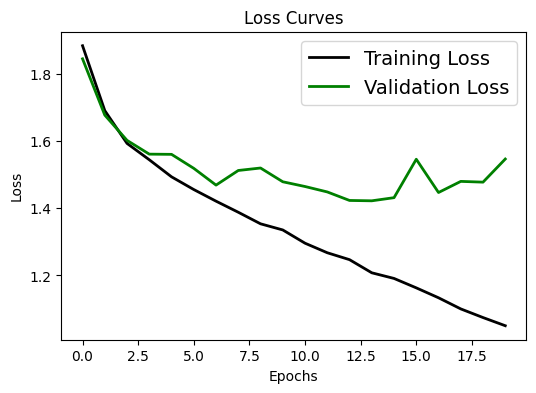

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(dnn_history.history['loss'], 'black', linewidth=2.0)
plt.plot(dnn_history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

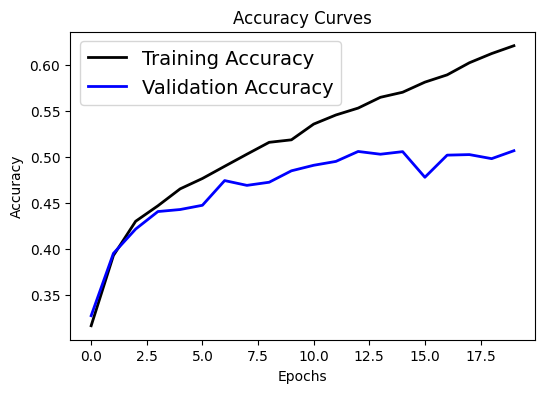

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(dnn_history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(dnn_history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# 3. CNN을 사용한 CIFAR10

### 3.1 CIFAR10 데이터셋


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images,test_images = train_images/255.0, test_images/255.0

In [ ]:
print(train_images.shape)
print(train_images.dtype)
print(test_images.shape)
print(test_images.dtype)

(50000, 32, 32, 3)
float64
(10000, 32, 32, 3)
float64


In [ ]:
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, stratify = train_labels, test_size = 0.1, random_state = 10)
print(train_images.shape, valid_images.shape)
print(np.unique(train_labels, return_counts = True))
print(np.unique(valid_labels, return_counts = True))
print(np.unique(test_labels, return_counts = True))

(45000, 32, 32, 3) (5000, 32, 32, 3)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


### 3.2 CNN Model

In [ ]:
cnn_model = keras.models.Sequential([
        ################## Fill Your Code! ##################
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images[0].shape),
        keras.layers.MaxPooling2D( (2, 2) ),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D( (2, 2) ),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),

        # 1. 데이터 1차원으로 펴주기
        # 2. 128개의 노드를 가지는 층 (relu)
        # 3. 분류기를 위한 층
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(len(class_names), activation='softmax')
        #####################################################
])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Model fit()
cnn_history = cnn_model.fit(train_images, train_labels, batch_size=64,epochs=20, validation_data = [valid_images, valid_labels])

Epoch 1/20
704/704 [==============================] - 10s 6ms/step - loss: 1.5507 - accuracy: 0.4354 - val_loss: 1.3650 - val_accuracy: 0.5182
Epoch 2/20
704/704 [==============================] - 4s 6ms/step - loss: 1.1773 - accuracy: 0.5820 - val_loss: 1.1679 - val_accuracy: 0.5982
Epoch 3/20
704/704 [==============================] - 4s 5ms/step - loss: 1.0167 - accuracy: 0.6430 - val_loss: 1.0191 - val_accuracy: 0.6444
Epoch 4/20
704/704 [==============================] - 3s 5ms/step - loss: 0.9087 - accuracy: 0.6802 - val_loss: 0.9418 - val_accuracy: 0.6804
Epoch 5/20
704/704 [==============================] - 4s 5ms/step - loss: 0.8226 - accuracy: 0.7108 - val_loss: 0.9135 - val_accuracy: 0.6856
Epoch 6/20
704/704 [==============================] - 4s 6ms/step - loss: 0.7519 - accuracy: 0.7380 - val_loss: 0.8296 - val_accuracy: 0.7152
Epoch 7/20
704/704 [==============================] - 4s 5ms/step - loss: 0.6805 - accuracy: 0.7594 - val_loss: 0.8678 - val_accuracy: 0.7058
Epoch

Text(0.5, 1.0, 'Loss Curves')

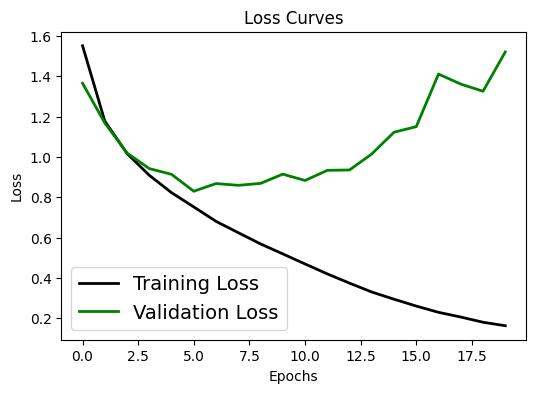

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(cnn_history.history['loss'], 'black', linewidth=2.0)
plt.plot(cnn_history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

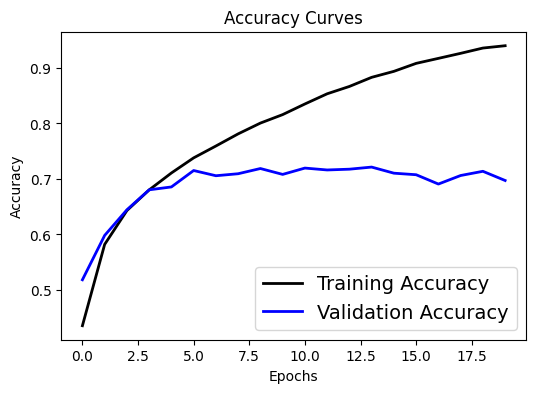

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(cnn_history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(cnn_history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)